In [1]:
import os 
import sys 

import numpy as np
import matplotlib.pyplot as plt 

In [2]:
import tensorflow as tf

2023-10-02 14:23:56.149071: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 14:23:56.365727: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-02 14:23:56.367949: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-02 14:23:57.345865: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import mplhep as hep
hep.style.use(hep.style.ROOT) 

In [4]:
import h5py
filename = "../data/new-raw-data/00000_ge_RAW_ADC.h5"

with h5py.File(filename, "r") as f:
    # print all root level object names/keys
    print("Keys: %s" % f.keys())
    # get list of names/keys
    keys = list(f.keys())

    e_data = list(f[keys[0]])
    g_data = list(f[keys[2]])

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


In [5]:
print(e_data[0].shape)
print(g_data[0].shape)

(5000, 2, 770)
(5000, 2, 770)


Text(1, 0, 'Time [Clock Cycles]')

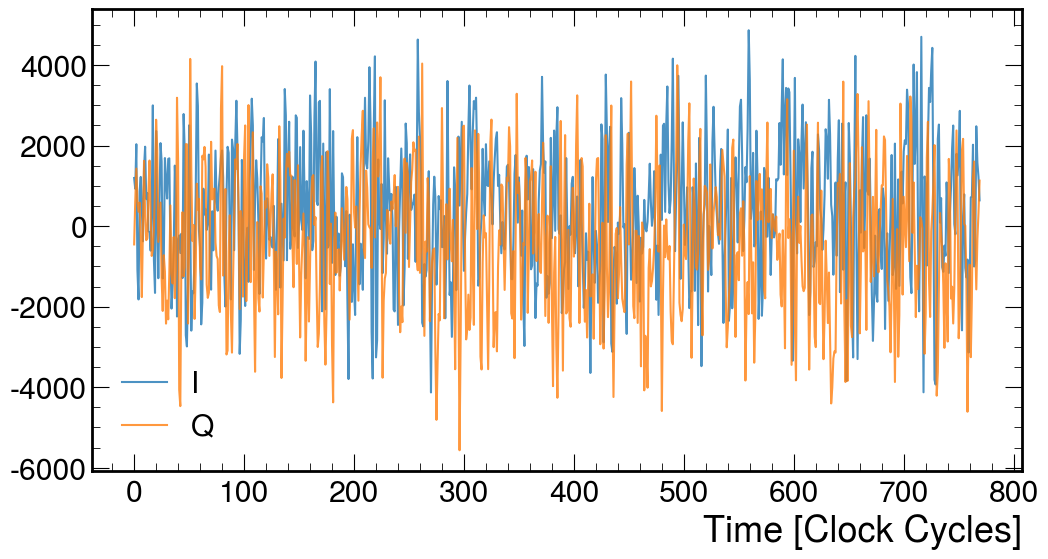

In [6]:
alpha = 0.8

plt.figure(figsize=(12,6))
plt.plot(e_data[0][0, 0, :], label='I', alpha=alpha)
plt.plot(e_data[0][0, 1, :], label='Q', alpha=alpha)

plt.legend(loc='lower left')
plt.xlabel('Time [Clock Cycles]')
# plt.title('In,phase & Quadrature Data')

In [7]:
e_coords = np.mean(e_data[0], axis=2)
g_coords = np.mean(g_data[0], axis=2)

e_path = np.mean(e_data[0], axis=0)
g_path = np.mean(g_data[0], axis=0)


def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def reject_outliers(data, g_data, m=10):
    return data[abs(data - np.mean(g_data)) > m * np.std(g_data)]


v = np.array([1, 1, 1, 1, 1, 1]) * (1/6)

e_path_i = np.convolve(e_path[0, :], v, mode='full')
e_path_q = np.convolve(e_path[1, :], v, mode='full')

e_path_i = reject_outliers(e_path_i, g_coords[0, :])
e_path_q = reject_outliers(e_path_q, g_coords[1, :])


g_path_i = np.convolve(g_path[0, :], v, mode='full')
g_path_q = np.convolve(g_path[1, :], v, mode='full')
# g_path_i = reject_outliers(g_path_i, e_coords[0, :], m=1) # Ground data is more consistent 
# g_path_q = reject_outliers(g_path_q, e_coords[1, :], m=1)

index = min(len(e_path_i), len(e_path_q))

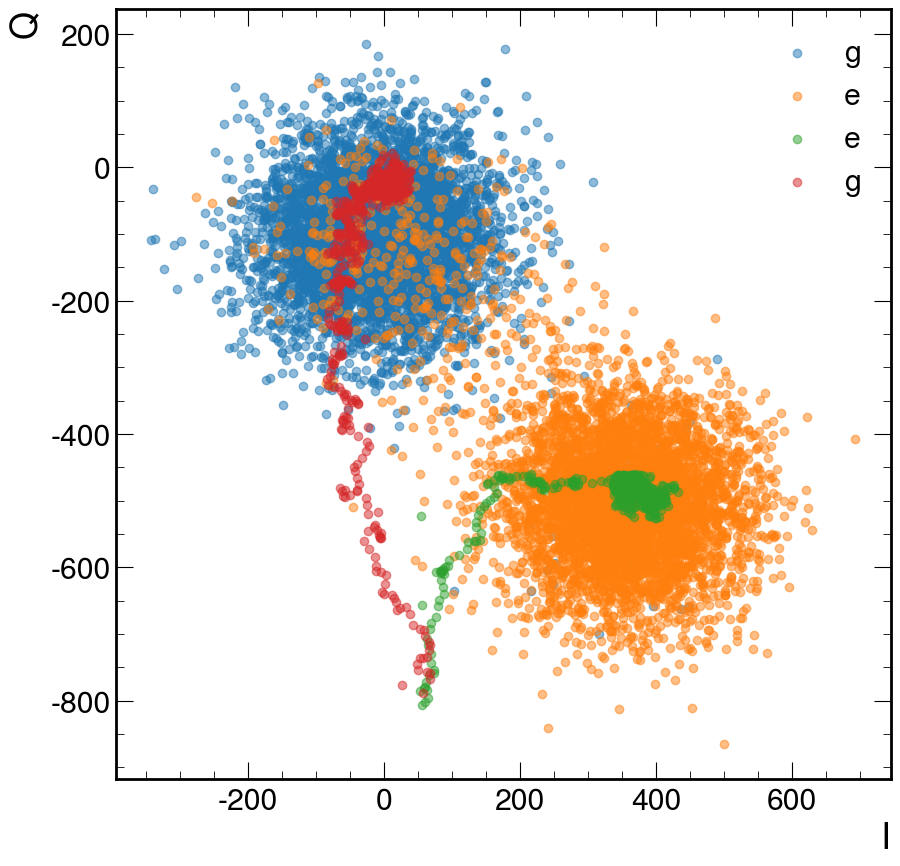

In [8]:
alpha = 0.5
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure()
plt.scatter(g_coords[:, 0], g_coords[:, 1], label='g', alpha=alpha)
plt.scatter(e_coords[:, 0], e_coords[:, 1], label='e', alpha=alpha)

plt.scatter(e_path_i[:index], e_path_q[:index], label='e', alpha=alpha)
plt.scatter(g_path_i[:index], g_path_q[:index], label='g', alpha=alpha)
# plt.scatter(g_path[0, :], g_path[1, :], label='e', alpha=alpha)
# plt.scatter(e_path[0, :], e_path[1, :], label='e', alpha=alpha)

plt.xlabel('I')
plt.ylabel('Q')
plt.legend()

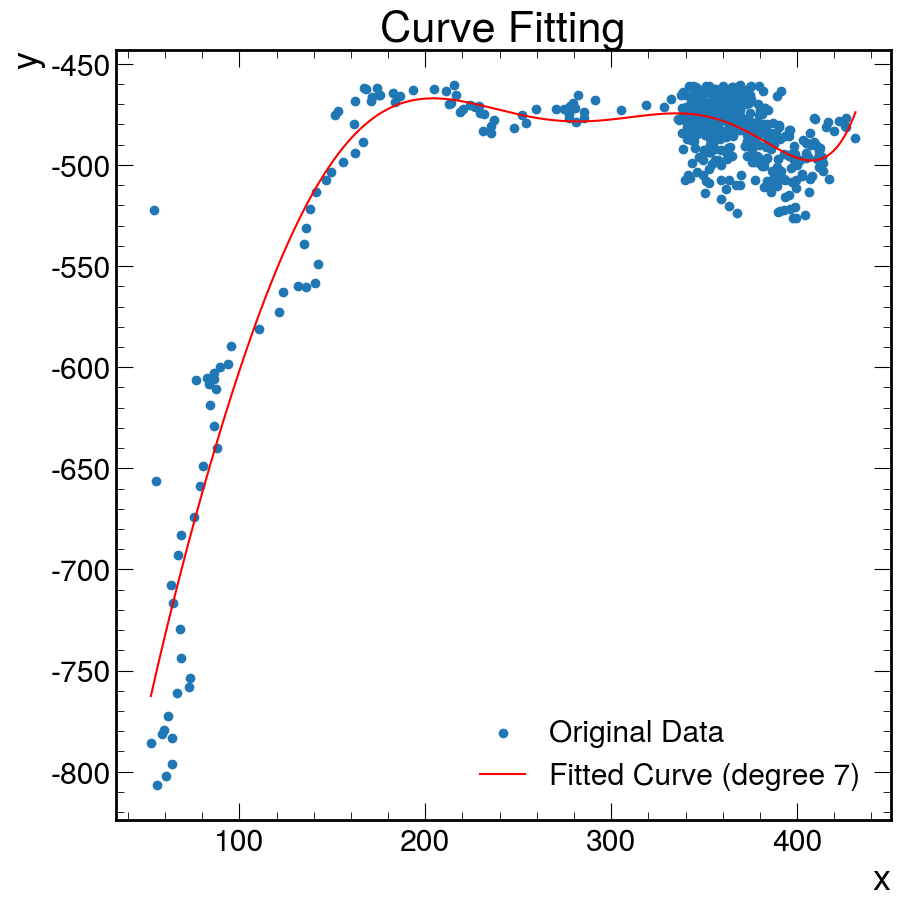

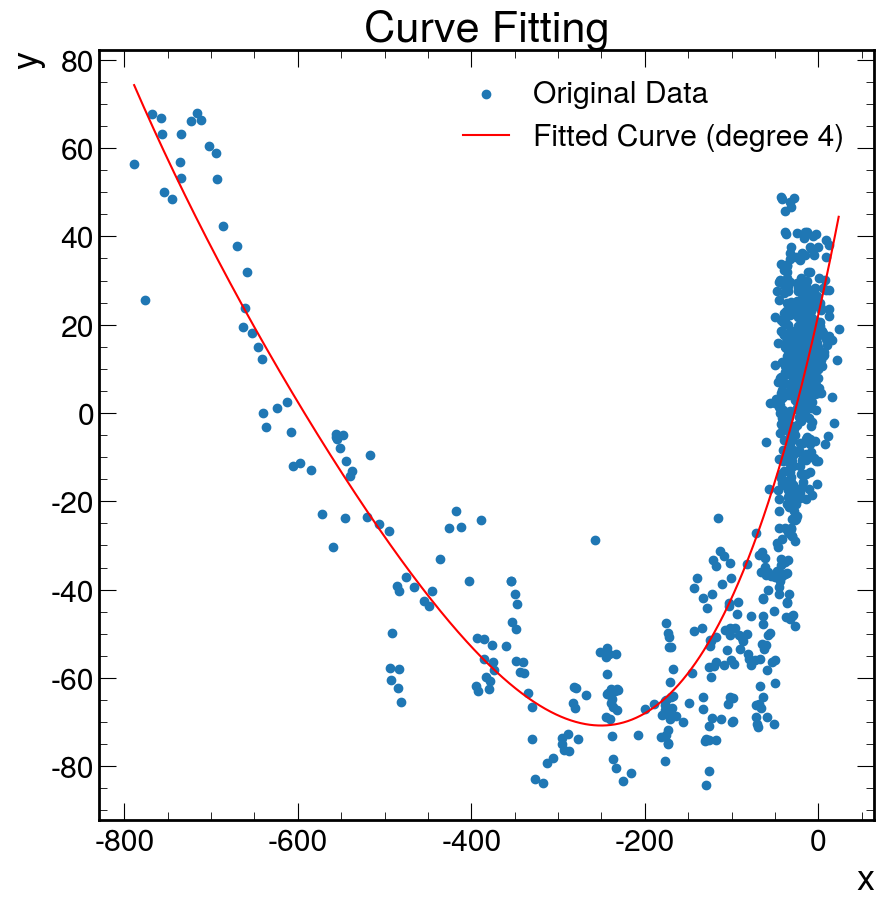

Fitted coefficients: [2.22559688e+01 8.80871920e-01 2.65998124e-03 2.80126727e-06
 1.20542713e-09]


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the function to fit (polynomial of degree n)
def polynomial(x, *coefficients):
    return sum(coefficients[i] * x**i for i in range(len(coefficients)))

# Generate some sample data
x_data = e_path_i[:index]
y_data = e_path_q[:index]

# Fit the curve using curve_fit
degree = 7  # Degree of the polynomial
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial, x_data, y_data, p0=initial_guess)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
ex_fit = np.linspace(min(x_data), max(x_data), 1000)
ey_fit = polynomial(ex_fit, *params)
plt.plot(ex_fit, ey_fit, 'r', label='Fitted Curve (degree {})'.format(degree))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting')
plt.show()

# print('Fitted coefficients:', params)

# Generate some sample data
y_data = g_path_i
x_data = g_path_q

# Fit the curve using curve_fit
degree = 4  # Degree of the polynomial
initial_guess = np.ones(degree + 1)  # Initial guess for coefficients
params, covariance = curve_fit(polynomial, x_data, y_data, p0=initial_guess)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label='Original Data')
gx_fit = np.linspace(min(x_data), max(x_data), 1000)
gy_fit = polynomial(gx_fit, *params)
plt.plot(gx_fit, gy_fit, 'r', label='Fitted Curve (degree {})'.format(degree))
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Curve Fitting')
plt.show()

print('Fitted coefficients:', params)

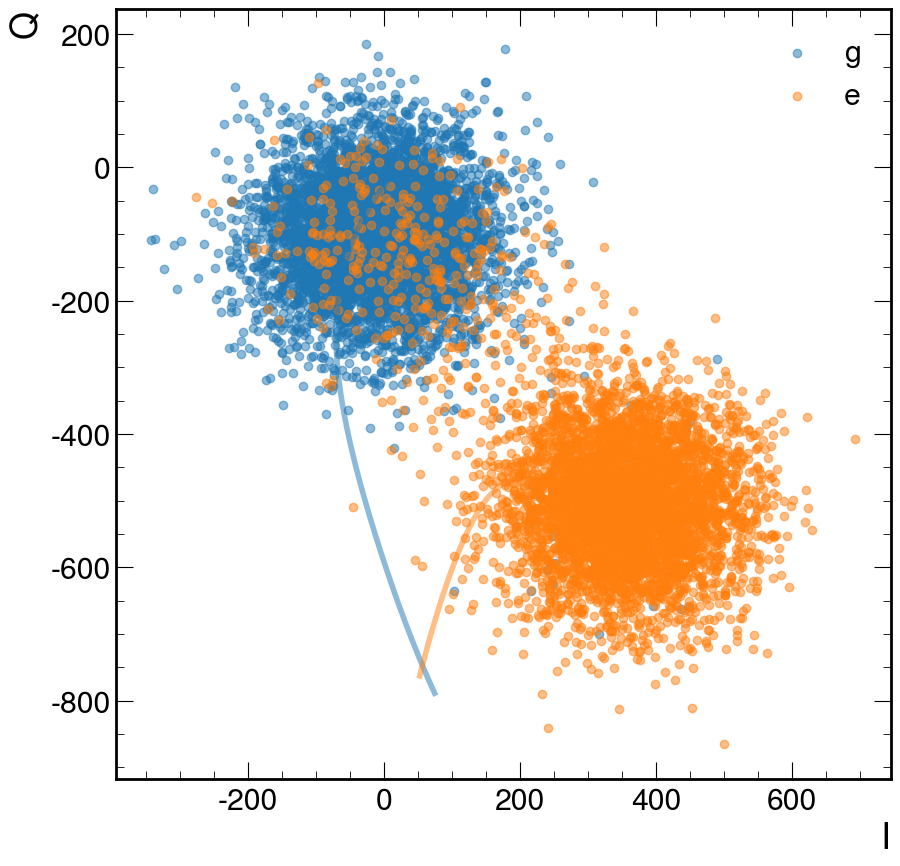

In [10]:
alpha = 0.5
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure()
plt.scatter(g_coords[:, 0], g_coords[:, 1], label='g', alpha=alpha)
plt.scatter(e_coords[:, 0], e_coords[:, 1], label='e', alpha=alpha)

# plt.scatter(g_path[0, :], g_path[1, :], label='g', alpha=alpha)
# plt.scatter(e_path[0, :], e_path[1, :], label='e', alpha=alpha)
# plt.scatter(g_path_i[:index], g_path_q[:index], label='g', alpha=alpha)
# plt.scatter(e_path_i[:index], e_path_q[:index], label='e', alpha=alpha)

plt.plot(gy_fit[:-50], gx_fit[:-50], lw=4, color='#1f77b4', alpha=alpha)
plt.plot(ex_fit, ey_fit, lw=4, color='#ff7f0e', alpha=alpha)

plt.xlabel('I')
plt.ylabel('Q')
plt.legend()

Maybe interesting, maybe not. Excited states tend to traverse more in,phase. While ground is its quadrature component.

In [11]:
def reject_outliers(data, g_data, m=6):
    return data[abs(data - np.mean(g_data)) < m * np.std(g_data)]

v = np.array([1, 1, 1, 1, 1, 1, 1, 1])
v = v * (1/len(v))

e_path_i = np.convolve(e_path[0, :], v, mode='full')
e_path_q = np.convolve(e_path[1, :], v, mode='full')

e_path_i = reject_outliers(e_path_i, e_coords[0, :])
e_path_q = reject_outliers(e_path_q, e_coords[1, :])

index = min(len(e_path_i), len(e_path_q))

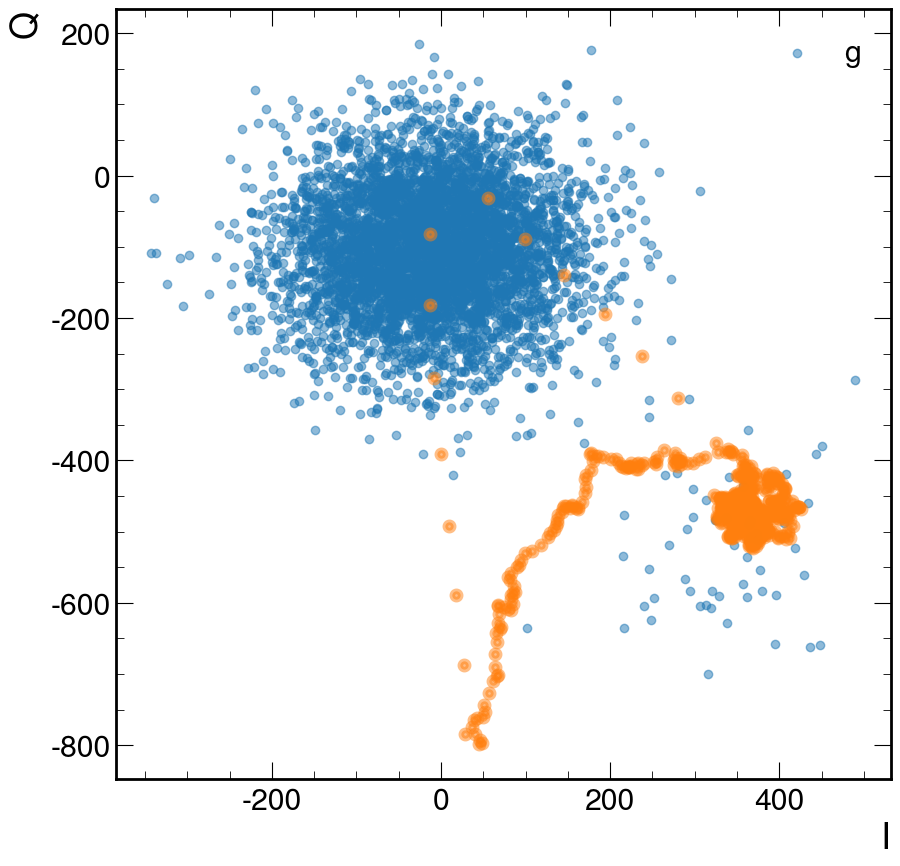

In [12]:
alpha = 0.5
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure()
plt.scatter(g_coords[:, 0], g_coords[:, 1], label='g', alpha=alpha)
# plt.scatter(e_coords[:, 0], e_coords[:, 1], label='e', alpha=alpha)

plt.scatter(e_path_i[:index], e_path_q[:index], lw=4, color='#ff7f0e', alpha=alpha)

plt.xlabel('I')
plt.ylabel('Q')
plt.legend()

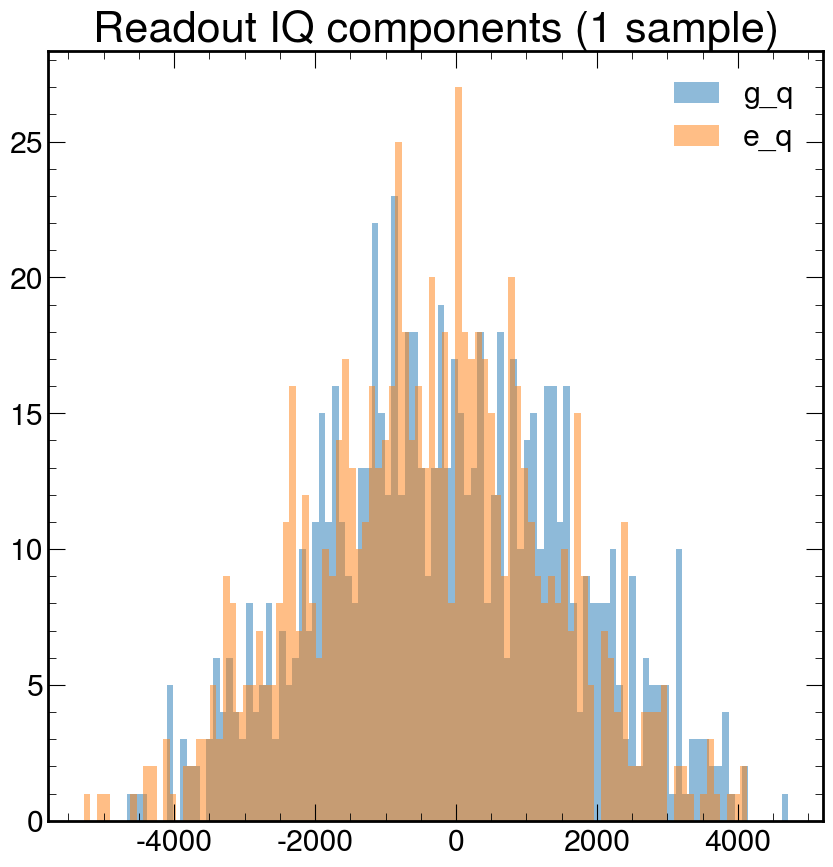

In [13]:
plt.figure()

sample_id = 4

i_data = g_data[0][sample_id, 0, :]
q_data = g_data[0][sample_id, 1, :]
_ = plt.hist(q_data, bins=100, alpha=0.5, label='g_q')

i_data = e_data[0][sample_id, 0, :]
q_data = e_data[0][sample_id, 1, :]
_ = plt.hist(q_data, bins=100, alpha=0.5, label='e_q')

plt.title('Readout IQ components (1 sample)')
plt.legend()

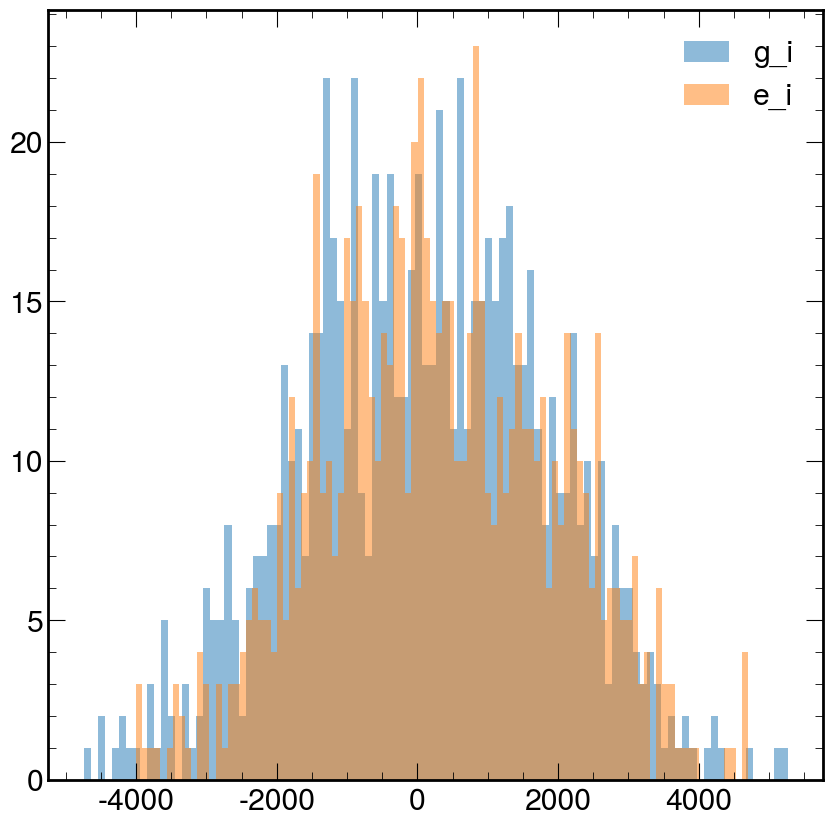

In [14]:
plt.figure()

sample_id = 4

i_data = g_data[0][sample_id, 0, :]
_ = plt.hist(i_data, bins=100, alpha=0.5, label='g_i')

i_data = e_data[0][sample_id, 0, :]
_ = plt.hist(i_data, bins=100, alpha=0.5, label='e_i')

plt.legend()

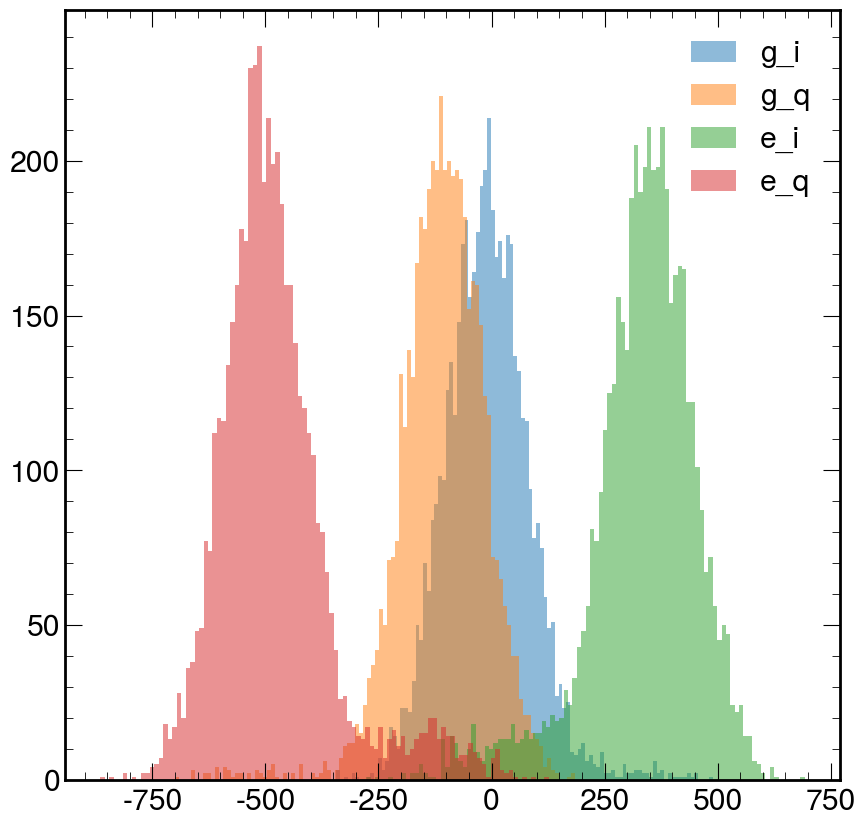

In [15]:
plt.figure()

sample_id = 4

_ = plt.hist(g_coords[:, 0], bins=100, alpha=0.5, label='g_i')
_ = plt.hist(g_coords[:, 1], bins=100, alpha=0.5, label='g_q')

_ = plt.hist(e_coords[:, 0], bins=100, alpha=0.5, label='e_i')
_ = plt.hist(e_coords[:, 1], bins=100, alpha=0.5, label='e_q')

# plt.title('Average IQ components')
plt.legend()

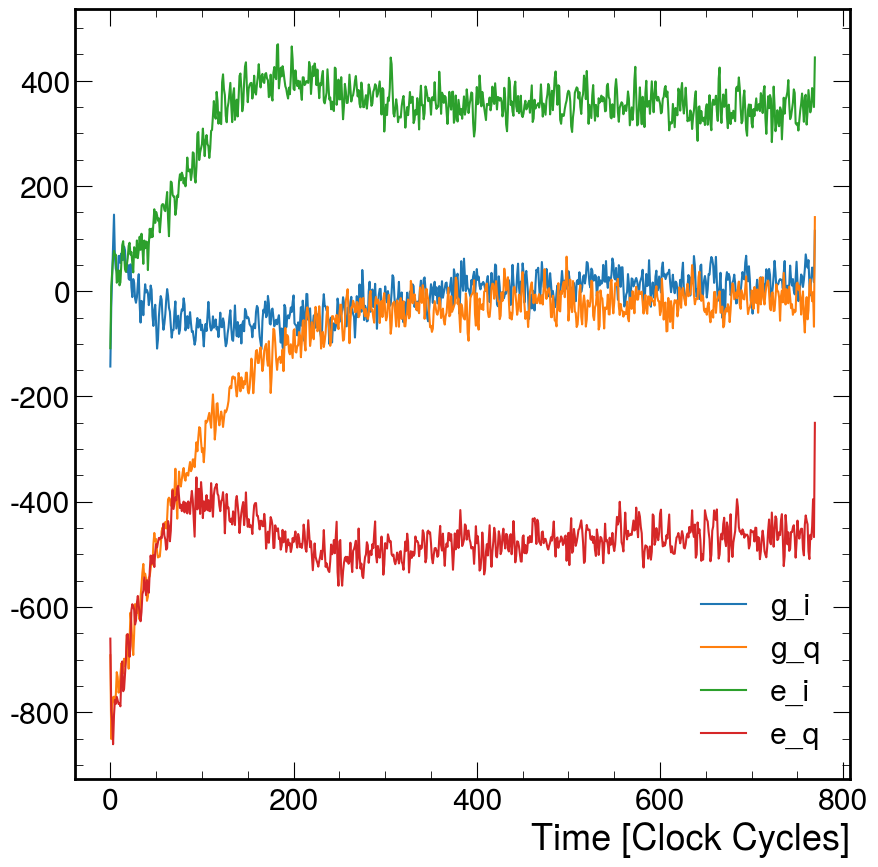

In [16]:
e_path = np.mean(e_data[0], axis=0)
g_path = np.mean(g_data[0], axis=0)

plt.figure()
plt.plot(g_path[0, :], label='g_i')
plt.plot(g_path[1, :], label='g_q')
plt.plot(e_path[0, :], label='e_i')
plt.plot(e_path[1, :], label='e_q')

plt.xlabel('Time [Clock Cycles]')
plt.legend()

Are there better ways to initialize the qubit? So the in,phase and quadrature components used for classifying are closer to the beginning of readout 

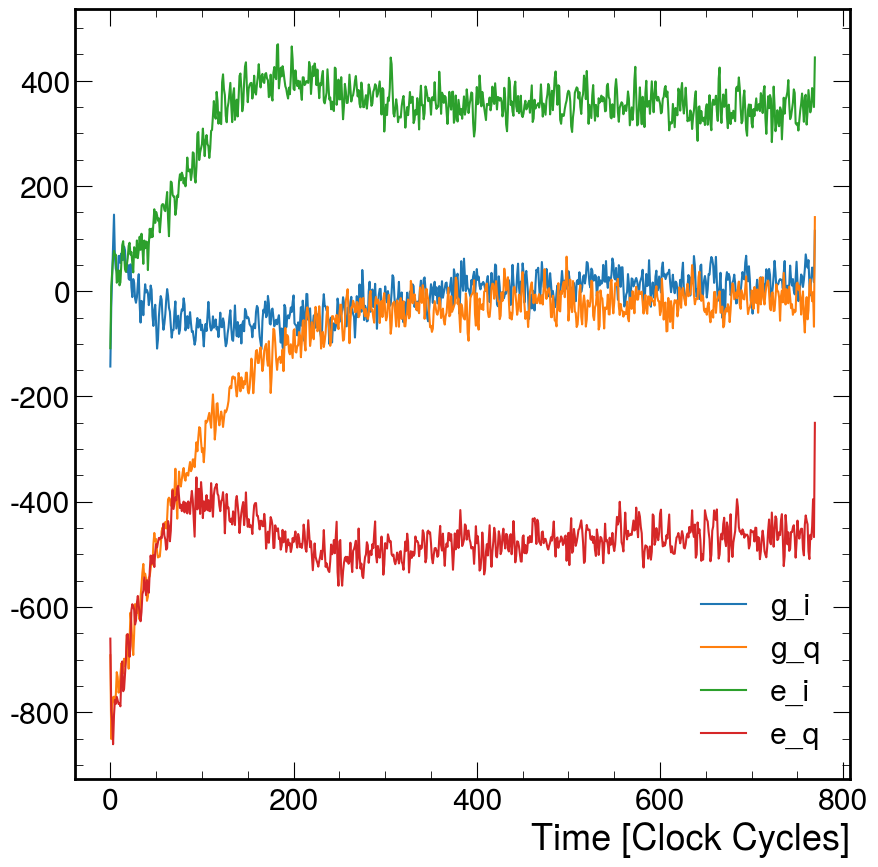

In [17]:
e_path = np.mean(e_data[0], axis=0)
g_path = np.mean(g_data[0], axis=0)

plt.figure()
plt.plot(g_path[0, :], label='g_i')
plt.plot(g_path[1, :], label='g_q')
plt.plot(e_path[0, :], label='e_i')
plt.plot(e_path[1, :], label='e_q')

# plt.axvline(x=335-50, linestyle='--', lw=3, color='black')
# plt.axvline(x=335+50, linestyle='--', lw=3, color='black')

# plt.axvline(x=200, linestyle='--', lw=3, color='black')
# plt.axvline(x=300, linestyle='--', lw=3, color='black')

plt.xlabel('Time [Clock Cycles]')
plt.legend()

In [18]:
baseline = 96.17

data = [
    [0,100,0.6624149990081787],
    [50,100,0.7841899996995926],
    [100,100,0.8554400014877319],
    [150,100,0.8834800016880036],
    [200,100,0.8878000009059906],
    [250,100,0.8833200007677078],
    [300,100,0.8786699992418289],
    [350,100,0.874125000834465],
    [400,100,0.8708199965953827],
    [450,100,0.8695299965143204],
    [500,100,0.8651149994134903],
    [550,100,0.8611249989271164],
    [600,100,0.8573600006103516],
    [650,100,0.8564699965715409],
    [670,100,0.8561449998617172],
]

data50 = [
    [0,50,0.5383149999380111],
    [50,50,0.6565399974584579],
    [100,50,0.7545450001955032],
    [150,50,0.8005550014972687],
    [200,50,0.8129300004243851],
    [250,50,0.8148650002479553],
    [300,50,0.8072050005197525],
    [350,50,0.8026150017976761],
    [400,50,0.7986450004577637],
    [450,50,0.7978749984502792],
    [500,50,0.795074999332428],
    [550,50,0.7895750021934509],
    [600,50,0.7908600038290023],
    [650,50,0.7886450022459031],
    [700,50,0.7864649975299836],
    [720,50,0.786499997973442],
]

data200 = [
    [0,200,0.8694749993085861],
    [50,200,0.9143600004911423],
    [100,200,0.9331299996376038],
    [150,200,0.9407000029087067],
    [200,200,0.9374000000953674],
    [250,200,0.9328650003671646],
    [300,200,0.9298400002717971],
    [350,200,0.9259149986505508],
    [400,200,0.9216900032758713],
    [450,200,0.9180050003528595],
    [500,200,0.9158999991416931],
    [550,200,0.9111849993467331],
    [570,200,0.9112599992752075],
]

data300 = [
    [0,300,0.9362550002336502],
    [50,300,0.9480749988555908],
    [100,300,0.9532899981737137],
    [150,300,0.9532749998569489],
    [200,300,0.9520799988508224],
    [250,300,0.9477299982309342],
    [300,300,0.944060001373291],
    [350,300,0.9401950019598008],
    [400,300,0.937399999499321],
    [450,300,0.9342699986696243],
    [470,300,0.9334249991178513],
]


data = np.array(data)
data[:,2] *= 100

data50 = np.array(data50)
data50[:,2] *= 100

data200 = np.array(data200)
data200[:,2] *= 100

data300 = np.array(data300)
data300[:,2] *= 100

length  = len(data300)

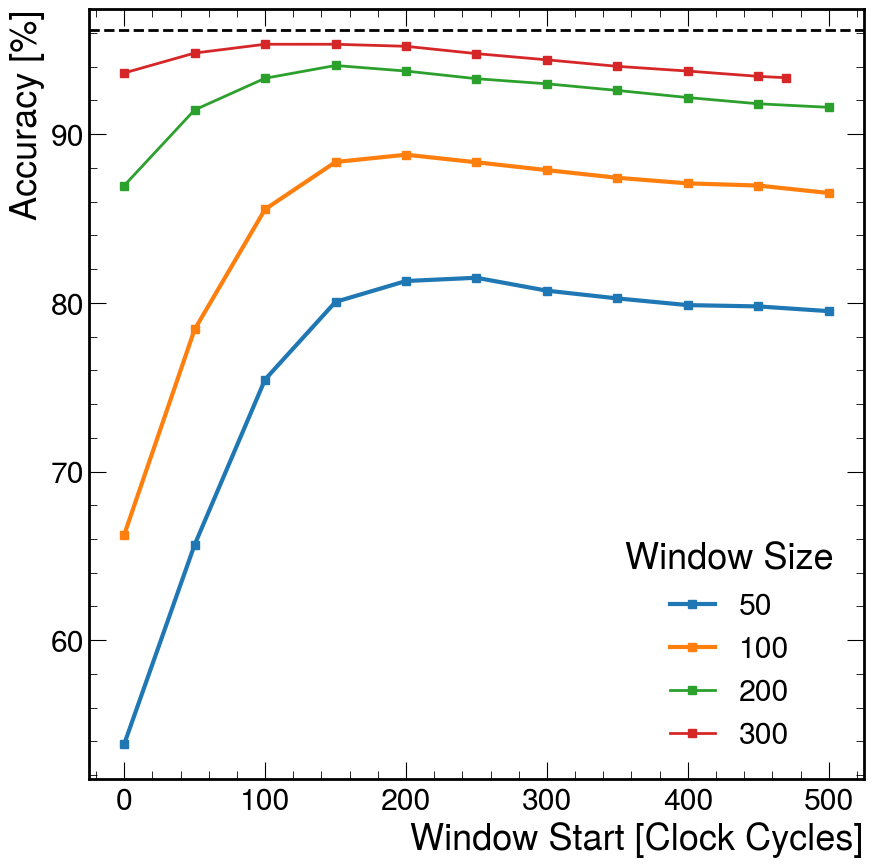

In [19]:
plt.figure()
plt.plot(data50[:length,0], data50[:length, 2], lw=3, marker='s', label='50')
plt.plot(data[:length,0], data[:length, 2], lw=3, marker='s', label='100')
plt.plot(data200[:length,0], data200[:length, 2], lw=2, marker='s', label='200')
plt.plot(data300[:length,0], data300[:length, 2], lw=2, marker='s', label='300')

plt.axhline(y=baseline, linestyle='--', lw=2, color='black')

# plt.axvline(x=200, linestyle='--', lw=3, color='black')
# plt.axvline(x=300, linestyle='--', lw=3, color='black')

plt.ylabel('Accuracy [%]')
plt.xlabel('Window Start [Clock Cycles]')
plt.legend(title='Window Size')

# Readout via Thresholding 

In [20]:
g_data[0].shape

(5000, 2, 770)

In [21]:
num_samples = 5000

e_coords = np.mean(e_data[0], axis=2)[:num_samples]
g_coords = np.mean(g_data[0], axis=2)[:num_samples]

e_coords.shape

(5000, 2)

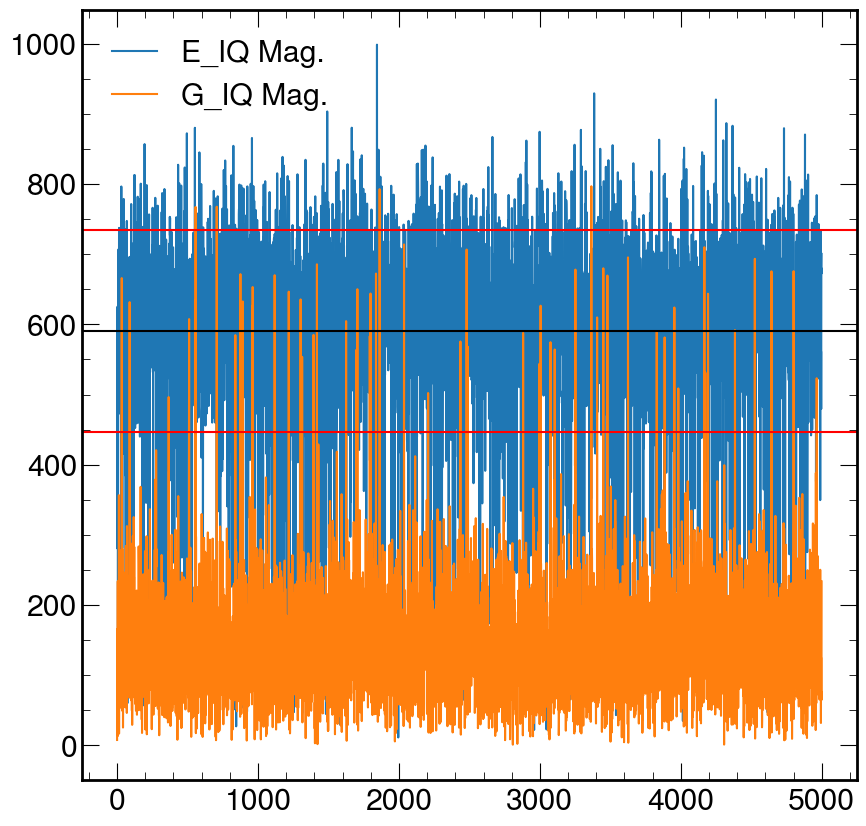

In [22]:
# Calculate the magnitude of IQ data for excited states of 5000 samples 
iq_e_magnitude = np.sqrt(np.square(e_coords[:, 0]) + np.square(e_coords[:, 1]))
iq_g_magnitude = np.sqrt(np.square(g_coords[:, 0]) + np.square(g_coords[:, 1]))

mean = np.mean(iq_e_magnitude)
m = 1
std = np.std(iq_e_magnitude) * m

plt.figure()
plt.plot(iq_e_magnitude, label='E_IQ Mag.')
plt.plot(iq_g_magnitude, label='G_IQ Mag.')

plt.axhline(mean, color='black')
plt.axhline(mean+std, color='red')
plt.axhline(mean-std, color='red')

plt.legend()

In [23]:
# Accuracy with Thresholding?
e_correct = (iq_e_magnitude > (mean-std)).sum()  # Sum should be 5000
g_correct = num_samples - (iq_g_magnitude > (mean-std)).sum()  # Sum should be 0

acc = (e_correct + g_correct) / (2 * num_samples)
print(f'Thresholding accuracy: {acc}')

Thresholding accuracy: 0.9453


In [24]:
# Now import new data 
import h5py
filename = "../data/new-raw-data/00001_ge_RAW_ADC.h5"

with h5py.File(filename, "r") as f:
    # print all root level object names/keys
    print("Keys: %s" % f.keys())
    # get list of names/keys
    keys = list(f.keys())

    e_data_100 = list(f[keys[0]])
    g_data_100 = list(f[keys[2]])


e_data_100 = np.mean(e_data_100[0], axis=2)
g_data_100 = np.mean(g_data_100[0], axis=2)

# Calculate the magnitude of IQ data for excited states of 5000 samples 
iq_e_magnitude = np.sqrt(np.square(e_data_100[:, 0]) + np.square(e_data_100[:, 1]))
iq_g_magnitude = np.sqrt(np.square(g_data_100[:, 0]) + np.square(g_data_100[:, 1]))

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


In [25]:
# Accuracy with Thresholding?
e_correct = (iq_e_magnitude > (mean-std)).sum()  # Sum should be 5000
g_correct = num_samples - (iq_g_magnitude > (mean-std)).sum()  # Sum should be 0

(e_correct + g_correct) / (2 * 5000)

0.9415

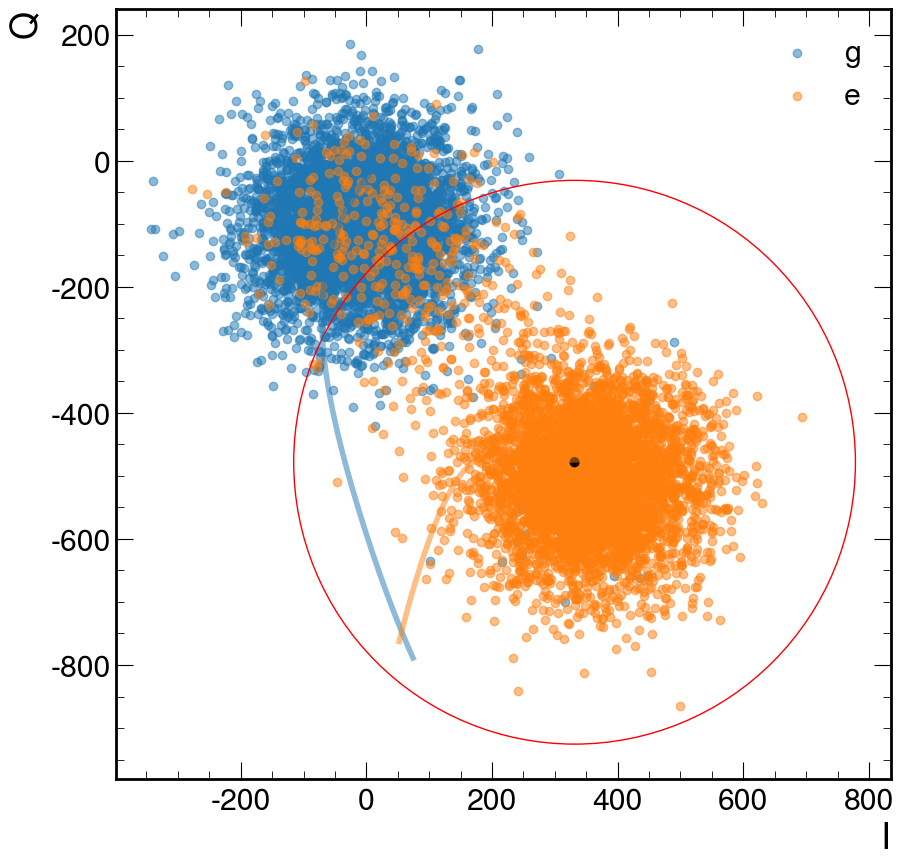

In [26]:
alpha = 0.5
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure()
plt.scatter(g_coords[:, 0], g_coords[:, 1], label='g', alpha=alpha)
plt.scatter(e_coords[:, 0], e_coords[:, 1], label='e', alpha=alpha)

# plt.scatter(g_path[0, :], g_path[1, :], label='g', alpha=alpha)
# plt.scatter(e_path[0, :], e_path[1, :], label='e', alpha=alpha)
# plt.scatter(g_path_i[:index], g_path_q[:index], label='g', alpha=alpha)
# plt.scatter(e_path_i[:index], e_path_q[:index], label='e', alpha=alpha)

plt.plot(gy_fit[:-50], gx_fit[:-50], lw=4, color='#1f77b4', alpha=alpha)
plt.plot(ex_fit, ey_fit, lw=4, color='#ff7f0e', alpha=alpha)

# Create a circle with radius 0.5 centered at (0.5, 0.5)
x = np.mean(e_coords[:, 0])
y = np.mean(e_coords[:, 1])

radius = mean-std*1
# radius = mean
center = plt.Circle((x, y), 7, color='black', fill=True)
circle = plt.Circle((x, y), radius, color='red', fill=False)

plt.gca().add_patch(center)
plt.gca().add_patch(circle)

# Add the circle to the plot
plt.xlabel('I')
plt.ylabel('Q')
plt.legend()


In [27]:
# Now import new data 
import h5py
from tqdm import tqdm

filename = "../data/new-raw-data/00010_ge_RAW_ADC.h5"

e_correct = 0
g_correct = 0
file_count = 0

for i in tqdm(range(1, 101)): # Loop over files
    file_name = f'../../data/new-raw-data/{str(i).zfill(5)}_ge_RAW_ADC.h5' # Generates '00001', '00002', ..., '00100'
    file_count += 1
    with h5py.File(filename, "r") as f:
        # print all root level object names/keys
        print("Keys: %s" % f.keys())
        # get list of names/keys
        keys = list(f.keys())

        e_data_100 = list(f[keys[0]])
        g_data_100 = list(f[keys[2]])

    e_data_100 = np.mean(e_data_100[0], axis=2)
    g_data_100 = np.mean(g_data_100[0], axis=2)

    # Calculate the magnitude of IQ data for excited states of 5000 samples 
    iq_e_magnitude = np.sqrt(np.square(e_data_100[:, 0]) + np.square(e_data_100[:, 1]))
    iq_g_magnitude = np.sqrt(np.square(g_data_100[:, 0]) + np.square(g_data_100[:, 1]))

    # Accuracy with Thresholding?
    e_correct += (iq_e_magnitude > (mean-std)).sum()  # Sum should be 5000
    g_correct += num_samples - (iq_g_magnitude > (mean-std)).sum()  # Sum should be 0

(e_correct + g_correct) / (2 * 5000 * file_count)

  0%|          | 0/100 [00:00<?, ?it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


  3%|▎         | 3/100 [00:01<00:38,  2.50it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


  9%|▉         | 9/100 [00:01<00:11,  8.27it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 12%|█▏        | 12/100 [00:01<00:08, 10.87it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 18%|█▊        | 18/100 [00:02<00:05, 14.96it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 24%|██▍       | 24/100 [00:02<00:04, 17.53it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 27%|██▋       | 27/100 [00:02<00:03, 18.35it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 33%|███▎      | 33/100 [00:02<00:03, 19.47it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 39%|███▉      | 39/100 [00:03<00:03, 20.06it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 42%|████▏     | 42/100 [00:03<00:02, 20.16it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 48%|████▊     | 48/100 [00:03<00:02, 20.29it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 54%|█████▍    | 54/100 [00:03<00:02, 20.36it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 57%|█████▋    | 57/100 [00:04<00:02, 20.42it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 63%|██████▎   | 63/100 [00:04<00:01, 20.48it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 69%|██████▉   | 69/100 [00:04<00:01, 20.53it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 72%|███████▏  | 72/100 [00:04<00:01, 20.55it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 78%|███████▊  | 78/100 [00:05<00:01, 20.59it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 84%|████████▍ | 84/100 [00:05<00:00, 20.55it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 87%|████████▋ | 87/100 [00:05<00:00, 20.57it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 93%|█████████▎| 93/100 [00:05<00:00, 20.53it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


 99%|█████████▉| 99/100 [00:06<00:00, 20.53it/s]

Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>
Keys: <KeysViewHDF5 ['e_data', 'end_stamp', 'g_data', 'start_stamp']>


100%|██████████| 100/100 [00:06<00:00, 16.08it/s]


0.9452

## Training History 

In [28]:
import pickle

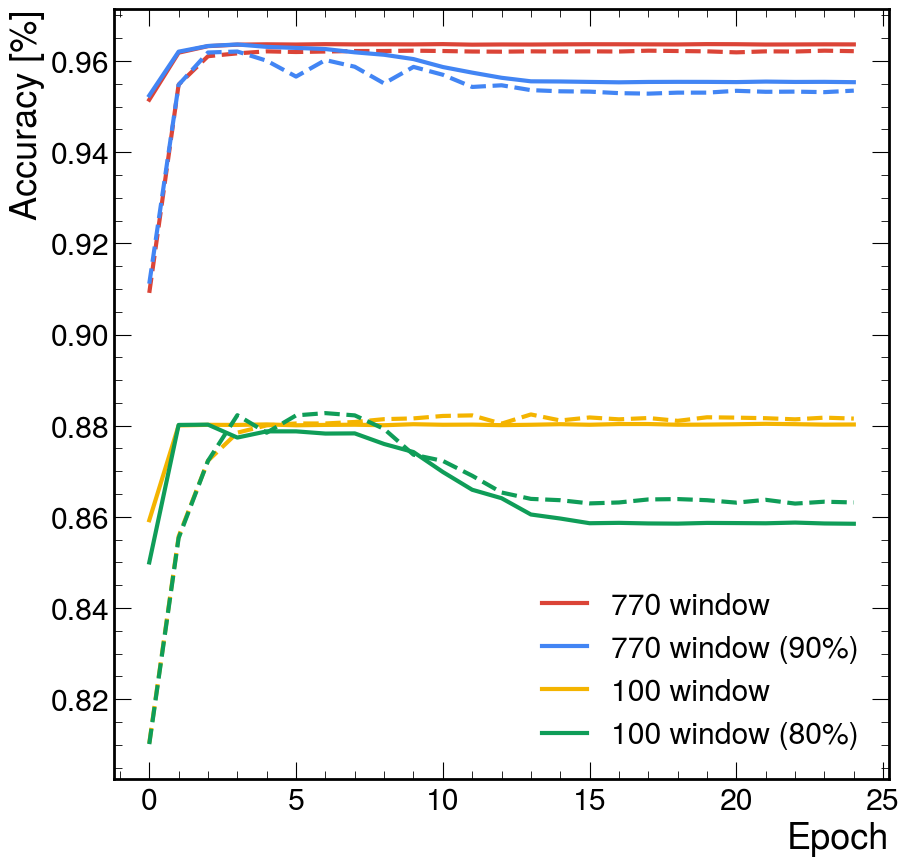

In [29]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'
v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

files = [v2_file, v2_pnq_file]
files = [v3_file, v3_pnq_file]

colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]

plt.figure()

for idx, file in enumerate([v2_file, v2_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '770 window (90%)' if 'pnq' in file else '770 window'
        plt.plot(history['accuracy'], lw=3, linestyle='-', label=label, color=colors[idx])
        plt.plot(history['val_accuracy'], lw=3, linestyle='--', color=colors[idx])

for idx, file in enumerate([v3_file, v3_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '100 window (80%)' if 'pnq' in file else '100 window'
        plt.plot(history['accuracy'], lw=3, linestyle='-', label=label, color=colors[idx+2])
        plt.plot(history['val_accuracy'], lw=3, linestyle='--', color=colors[idx+2])

plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.legend()

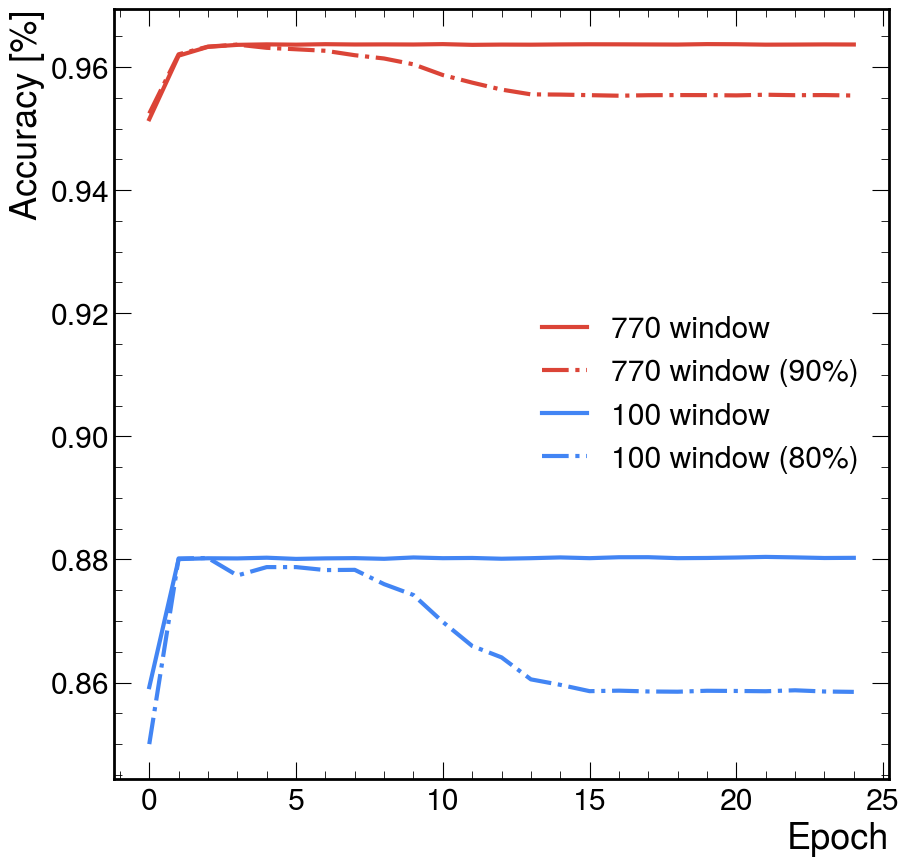

In [39]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'
v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

files = [v2_file, v2_pnq_file]
files = [v3_file, v3_pnq_file]

colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]

plt.figure()

for idx, file in enumerate([v2_file, v2_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '770 window (90%)' if 'pnq' in file else '770 window'
        linestyle = '-.' if 'pnq' in file else '-'
        plt.plot(history['accuracy'], lw=3, linestyle=linestyle, label=label, color=colors[0])

for idx, file in enumerate([v3_file, v3_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '100 window (80%)' if 'pnq' in file else '100 window'
        linestyle = '-.' if 'pnq' in file else '-'
        plt.plot(history['accuracy'], lw=3, linestyle=linestyle, label=label, color=colors[1])
        # plt.plot(history['val_accuracy'], lw=3, linestyle='--', color=colors[idx+2])

plt.ylabel('Accuracy [%]')
plt.xlabel('Epoch')
plt.legend()

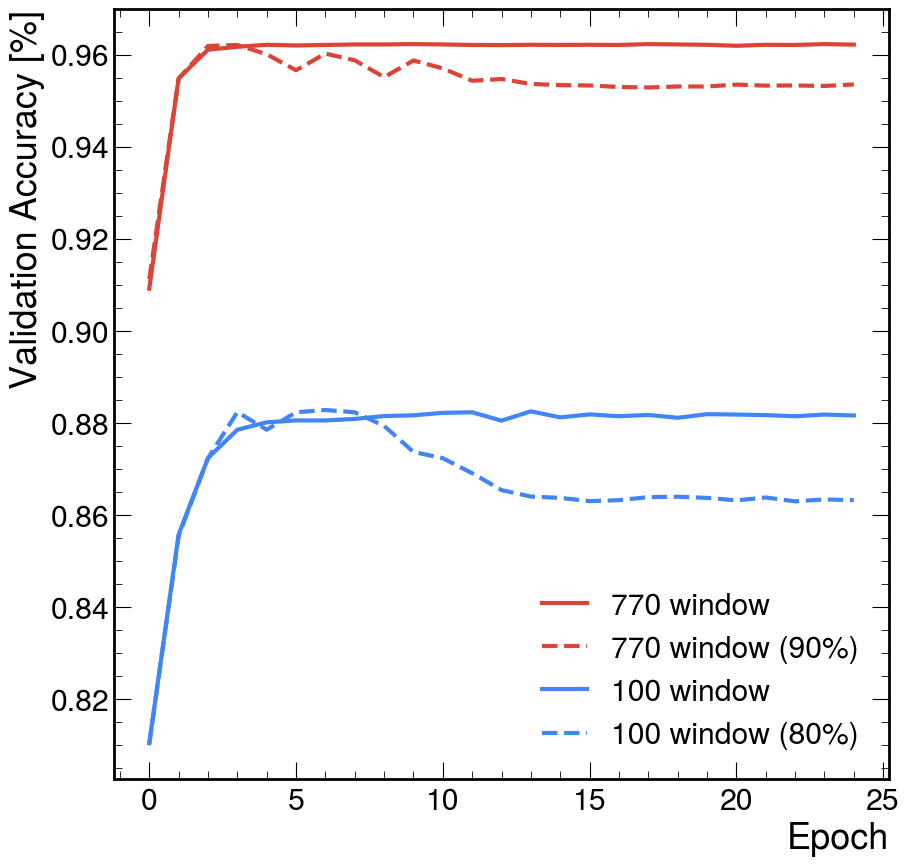

In [41]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'
v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

files = [v2_file, v2_pnq_file]
files = [v3_file, v3_pnq_file]

colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]

plt.figure()

for idx, file in enumerate([v2_file, v2_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '770 window (90%)' if 'pnq' in file else '770 window'
        linestyle = '--' if 'pnq' in file else '-'
        plt.plot(history['val_accuracy'], lw=3, linestyle=linestyle, label=label, color=colors[0])

for idx, file in enumerate([v3_file, v3_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '100 window (80%)' if 'pnq' in file else '100 window'
        linestyle = '--' if 'pnq' in file else '-'
        plt.plot(history['val_accuracy'], lw=3, linestyle=linestyle, label=label, color=colors[1])

plt.ylabel('Validation Accuracy [%]')
plt.xlabel('Epoch')
plt.legend()

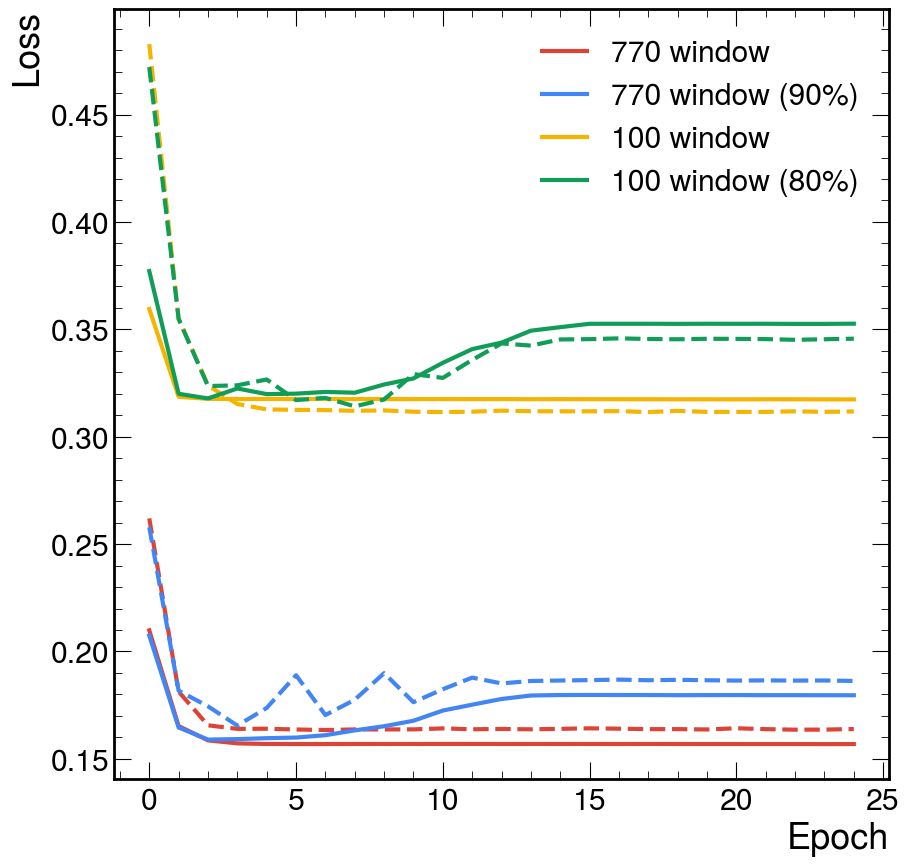

In [32]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'
v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

files = [v2_file, v2_pnq_file]
files = [v3_file, v3_pnq_file]

colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]
colors_map = {
    "#DB4437": '#DB4430', 
    "#4285F4": '#4285F0',
    "#F4B400": 'F4B3A00',
    "#0F9D58": '#0F9D50', 
    "purple": "purple"
}

plt.figure()

for idx, file in enumerate([v2_file, v2_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '770 window (90%)' if 'pnq' in file else '770 window'
        plt.plot(history['loss'], lw=3, linestyle='-', label=label, color=colors[0])
        plt.plot(history['val_loss'], lw=3, linestyle='--', color=colors[0])

for idx, file in enumerate([v3_file, v3_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '100 window (80%)' if 'pnq' in file else '100 window'
        linestyle = '-.' if 'pnq' in file else '-'
        plt.plot(history['loss'], lw=3, linestyle='-', label=label, color=colors[idx+2])
        plt.plot(history['val_loss'], lw=3, linestyle='--', color=colors[idx+2])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

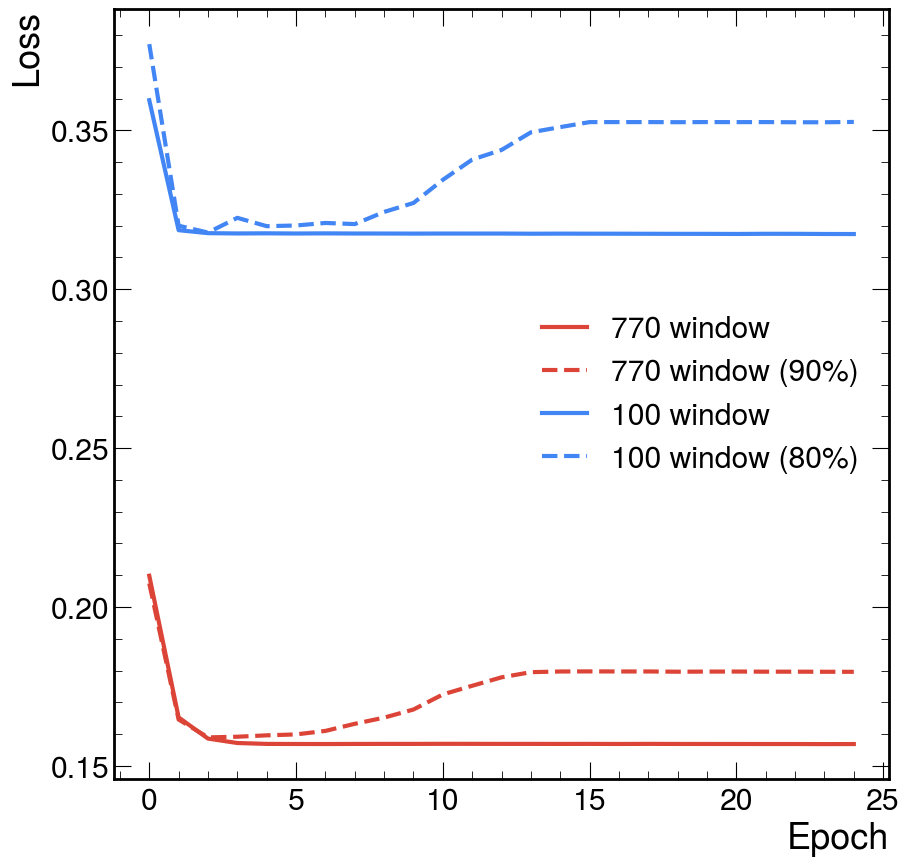

In [43]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'
v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

files = [v2_file, v2_pnq_file]
files = [v3_file, v3_pnq_file]

colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]
colors_map = {
    "#DB4437": '#DB4430', 
    "#4285F4": '#4285F0',
    "#F4B400": 'F4B3A00',
    "#0F9D58": '#0F9D50', 
    "purple": "purple"
}

plt.figure()

for idx, file in enumerate([v2_file, v2_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '770 window (90%)' if 'pnq' in file else '770 window'
        linestyle = '--' if 'pnq' in file else '-'
        plt.plot(history['loss'], lw=3, linestyle=linestyle, label=label, color=colors[0])

for idx, file in enumerate([v3_file, v3_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '100 window (80%)' if 'pnq' in file else '100 window'
        linestyle = '--' if 'pnq' in file else '-'
        plt.plot(history['loss'], lw=3, linestyle=linestyle, label=label, color=colors[1])
        # plt.plot(history['val_loss'], lw=3, linestyle='--', color=colors[idx+2])

plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

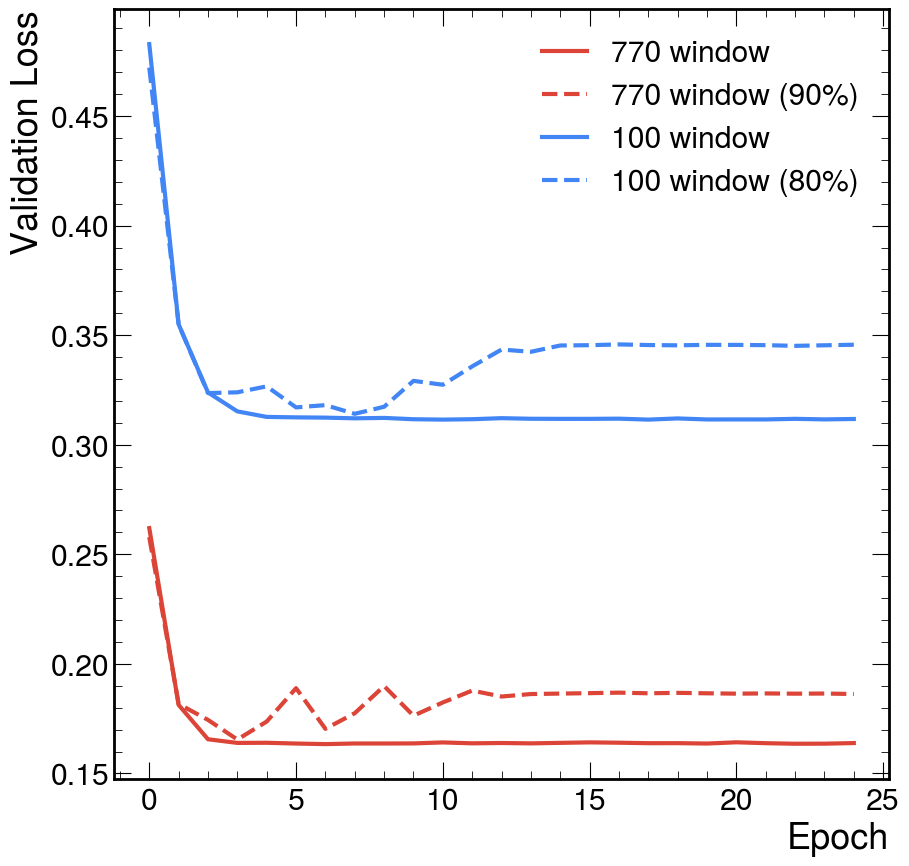

In [44]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'
v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

files = [v2_file, v2_pnq_file]
files = [v3_file, v3_pnq_file]

colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]
colors_map = {
    "#DB4437": '#DB4430', 
    "#4285F4": '#4285F0',
    "#F4B400": 'F4B3A00',
    "#0F9D58": '#0F9D50', 
    "purple": "purple"
}

plt.figure()

for idx, file in enumerate([v2_file, v2_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '770 window (90%)' if 'pnq' in file else '770 window'
        linestyle = '--' if 'pnq' in file else '-'
        plt.plot(history['val_loss'], lw=3, linestyle=linestyle, label=label, color=colors[0])

for idx, file in enumerate([v3_file, v3_pnq_file]):
    with open(file.replace('.h5', '-history.pkl'), "rb") as file_pi:
        history = pickle.load(file_pi)
        label = '100 window (80%)' if 'pnq' in file else '100 window'
        linestyle = '--' if 'pnq' in file else '-'
        plt.plot(history['val_loss'], lw=3, linestyle=linestyle, label=label, color=colors[1])


plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend()

## ROC Curves

In [45]:
from sklearn.metrics import average_precision_score, f1_score, roc_auc_score
from sklearn.metrics import roc_curve, auc

In [46]:
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects

In [47]:
v2_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter.h5'
v2_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v2_filter_pnq.h5'

v3_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter.h5'
v3_pnq_file = '/data/jcampos/ml-quantum-readout/training/src_keras/qkeras_v3_filter_pnq.h5'

In [48]:
data_dir = '../data/new-raw-data/'

X_test = np.load(os.path.join(data_dir, 'X_test.npy'))    
y_test = np.load(os.path.join(data_dir, 'y_test.npy'), allow_pickle=True)

In [49]:
co = {}
_add_supported_quantized_objects(co)
model = load_model(v2_file, custom_objects=co, compile=False)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 2)                 3082      
                                                                 
 batch_normalization (Batch  (None, 2)                 8         
 Normalization)                                                  
                                                                 
Total params: 3090 (12.07 KB)
Trainable params: 3086 (12.05 KB)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [50]:
co = {}
_add_supported_quantized_objects(co)
model = load_model(v3_file, custom_objects=co, compile=False)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 fc1 (Dense)                 (None, 2)                 402       
                                                                 
 batch_normalization (Batch  (None, 2)                 8         
 Normalization)                                                  
                                                                 
Total params: 410 (1.60 KB)
Trainable params: 406 (1.59 KB)
Non-trainable params: 4 (16.00 Byte)
_________________________________________________________________


In [51]:
co = {}
_add_supported_quantized_objects(co)

model = load_model(v3_file, custom_objects=co, compile=False)
y_pred_v3 = model.predict(X_test)

model = load_model(v3_pnq_file, custom_objects=co, compile=False)
y_pred_v3_pnq = model.predict(X_test)

6313/6313 [==============================] - 5s 740us/step


In [52]:
y_pred_v3 = tf.nn.softmax(y_pred_v3)
y_pred_v3_pnq = tf.nn.softmax(y_pred_v3_pnq)

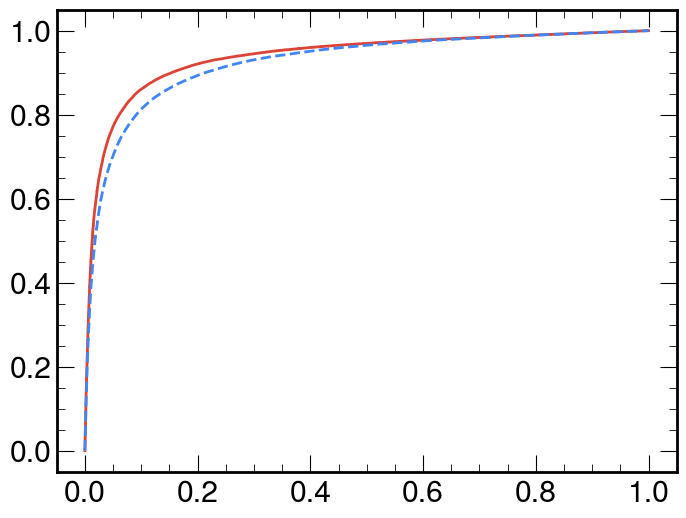

In [53]:
plt.figure(0, figsize=(8, 6))
colors = ["#DB4437", "#4285F4", "#F4B400", "#0F9D58", "purple"]
color_idx = 0

# Compute ROC curve parameters
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_v3.numpy()[:, 1])
roc_auc_v3 = auc(fpr_v3, tpr_v3)

fpr_v3_pnq, tpr_v3_pnq, thresholds = roc_curve(y_test, y_pred_v3_pnq.numpy()[:, 1])
roc_auc_v3_pnq = auc(fpr_v3_pnq, tpr_v3_pnq)

# Plot ROC curve
plt.figure(0)
plt.plot(fpr_v3, tpr_v3, color=colors[0], lw=2, label='{} (area = {:.2f})'.format('v3', roc_auc_v3))
plt.plot(fpr_v3_pnq, tpr_v3_pnq, color=colors[1], lw=2, linestyle='--', label='{} (area = {:.2f})'.format('v3', roc_auc_v3_pnq))


In [54]:
data_dir = '../data/new-raw-data-all/'

X_train = np.load(os.path.join(data_dir, 'X_train.npy'))    
y_train = np.load(os.path.join(data_dir, 'y_train.npy'))    
X_test = np.load(os.path.join(data_dir, 'X_test.npy'))    
y_test = np.load(os.path.join(data_dir, 'y_test.npy'), allow_pickle=True)

In [55]:
co = {}
_add_supported_quantized_objects(co)

model = load_model(v2_file, custom_objects=co, compile=False)
y_pred_v2 = model.predict(X_test)

model = load_model(v2_pnq_file, custom_objects=co, compile=False)
y_pred_v2_pnq = model.predict(X_test)

3157/3157 [==============================] - 2s 754us/step


In [56]:
y_pred_v2 = tf.nn.softmax(y_pred_v2)
y_pred_v2_pnq = tf.nn.softmax(y_pred_v2_pnq)

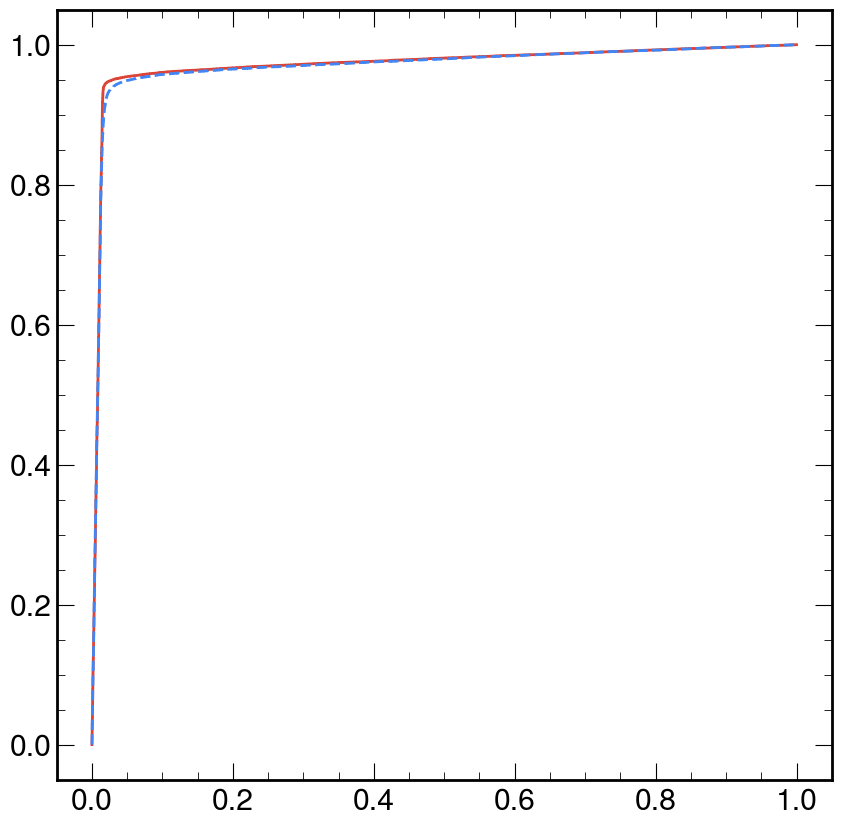

In [57]:
# Compute ROC curve parameters
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_v2.numpy()[:, 1])
roc_auc_v2 = auc(fpr_v2, tpr_v2)

fpr_v2_pnq, tpr_v2_pnq, thresholds = roc_curve(y_test, y_pred_v2_pnq.numpy()[:, 1])
roc_auc_v2_pnq = auc(fpr_v2_pnq, tpr_v2_pnq)

# Plot ROC curve
plt.figure(0)
plt.plot(fpr_v2, tpr_v2, color=colors[0], lw=2, label='{} (area = {:.2f})'.format('v3', roc_auc_v2))
plt.plot(fpr_v2_pnq, tpr_v2_pnq, color=colors[1], lw=2, linestyle='--', label='{} (area = {:.2f})'.format('v3', roc_auc_v2_pnq))


In [58]:
def split_data(X, y, split):
    if split == 1:
        return X, y
    index = int(len(X) * split)
    X = X[:index]
    y = y[:index]
    return X, y

In [59]:
data_dir = '../data/new-raw-data/'

X_train = np.load(os.path.join(data_dir, 'X_train.npy'))    
y_train = np.load(os.path.join(data_dir, 'y_train.npy'))    
X_test = np.load(os.path.join(data_dir, 'X_test.npy'))    
y_test = np.load(os.path.join(data_dir, 'y_test.npy'), allow_pickle=True)

X, y = split_data(X_train, y_train, 0.03)
# X_test, y_test = split_data(X_train, y_train, 0.04)

In [60]:
# ('Gradient Boosting', GradientBoostingClassifier, 0.1),
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier().fit(X, y)
test_score = clf.score(X_test, y_test)

print(f'Test score: {test_score}')

# Compute ROC curve parameters
y_prob = clf.predict_proba(X_test)[:, 1]
fpr_gb, tpr_gb, thresholds = roc_curve(y_test, y_prob)
roc_auc_gb = auc(fpr_gb, tpr_gb)

Test score: 0.828069306930693


In [61]:
# ('Gradient Boosting', GradientBoostingClassifier, 0.1),
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

clf = RandomForestClassifier(max_depth=12).fit(X, y)
test_score = clf.score(X_test, y_test)

print(f'Test score: {test_score}')

# Compute ROC curve parameters
y_prob_rf = clf.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

Test score: 0.8399950495049505


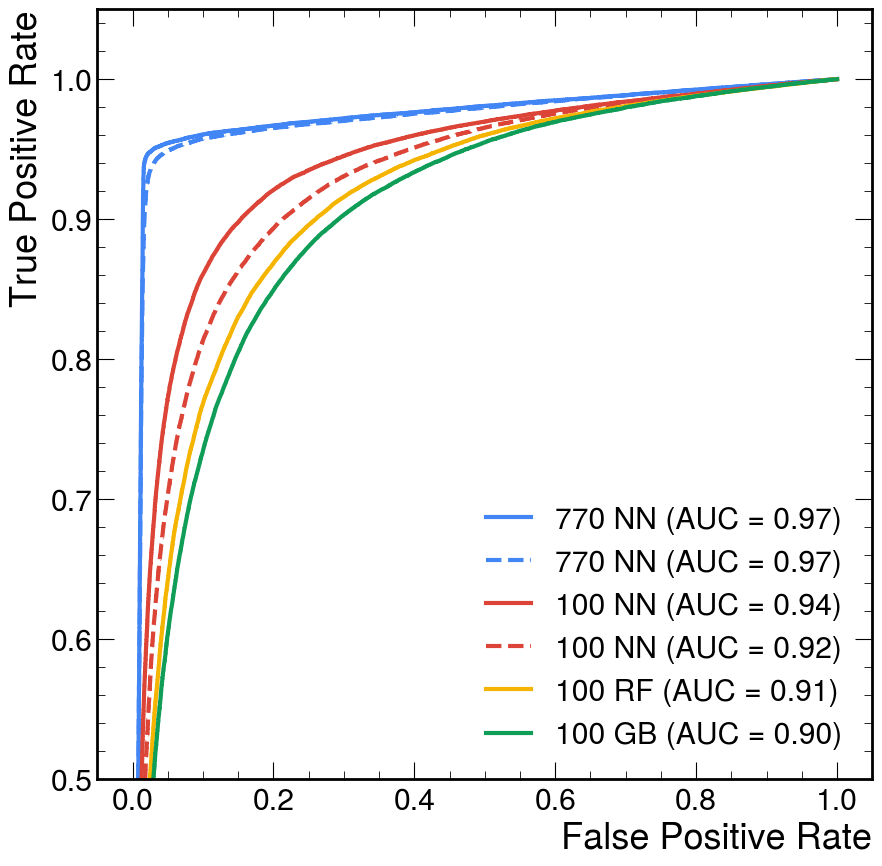

In [65]:
# Plot ROC curve
plt.figure(0)
plt.plot(fpr_v2, tpr_v2, color=colors[1], lw=3, label='{} (AUC = {:.2f})'.format('770 NN', roc_auc_v2))
plt.plot(fpr_v2_pnq, tpr_v2_pnq, color=colors[1], lw=3, linestyle='--', label='{} (AUC = {:.2f})'.format('770 NN', roc_auc_v2_pnq))

plt.plot(fpr_v3, tpr_v3, color=colors[0], lw=3, label='{} (AUC = {:.2f})'.format('100 NN', roc_auc_v3))
plt.plot(fpr_v3_pnq, tpr_v3_pnq, color=colors[0], lw=3, linestyle='--', label='{} (AUC = {:.2f})'.format('100 NN', roc_auc_v3_pnq))

plt.plot(fpr_rf, tpr_rf, color=colors[2], lw=3, label='{} (AUC = {:.2f})'.format('100 RF', roc_auc_rf))
plt.plot(fpr_gb, tpr_gb, color=colors[3], lw=3, label='{} (AUC = {:.2f})'.format('100 GB', roc_auc_gb))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(bottom=0.5)
plt.legend()

In [66]:

p = np.random.permutation(len(X_train))
X = X_train[p]
y = y_train[p]

In [67]:
X, y = split_data(X, y, 0.005)

In [68]:
X.shape

(4040, 200)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
# Train a BDT
clf = GradientBoostingClassifier().fit(X, y)

In [70]:
test_score = clf.score(X_test, y_test)

print(f'Test score: {test_score}')

Test score: 0.8076089108910891


In [71]:
import conifer

In [72]:
build = False

if build:
    # Create a conifer config dictionary
    cfg = conifer.backends.xilinxhls.auto_config()
    # Change the bit precision (print the config to see everything modifiable)
    cfg['Precision'] = 'ap_fixed<18,2>' 
    cfg['ClockPeriod'] = 3.225
    cfg['XilinxPart'] = 'xczu49dr-ffvf1760-2-e'

    # Convert the sklearn model to a conifer model
    model = conifer.converters.convert_from_sklearn(clf, cfg)
    # Write the HLS project and compile the C++-Python bridge                      
    model.compile()

    # Run bit-accurate prediction on the CPU
    y_hls = model.decision_function(X)
    y_skl = clf.decision_function(X)

    # Synthesize the model for the target FPGA
    model.build()

## ROC Curves with HLS Model

In [73]:
import os 
import numpy as np 
from tensorflow.keras.models import load_model
from qkeras.utils import _add_supported_quantized_objects
from sklearn.metrics import accuracy_score

In [74]:
from sklearn.metrics import roc_curve, auc


In [75]:
data_dir = '../data/new-raw-data-all/'
y_test = np.load(os.path.join(data_dir, 'y_test.npy'), allow_pickle=True)

In [76]:
y_v2_hls_preds = np.load('v2_hls.npy')
y_v2_hls_preds.shape

(101000, 2)

In [77]:
# Compute ROC curve parameters
fpr_hls_v2, tpr_hls_v2, thresholds = roc_curve(y_test, y_v2_hls_preds[:, 1])
roc_auc_hls_v2 = auc(fpr_hls_v2, tpr_hls_v2)

In [78]:
roc_auc_v2

0.9719551692156861

In [79]:
data_dir = '../data/new-raw-data/'
y_test = np.load(os.path.join(data_dir, 'y_test.npy'), allow_pickle=True)

y_v3_hls_preds = np.load('v3_hls.npy')
y_v3_hls_preds.shape

# Compute ROC curve parameters
fpr_hls_v3, tpr_hls_v3, thresholds = roc_curve(y_test, y_v3_hls_preds[:, 1])
roc_auc_hls_v3 = auc(fpr_hls_v3, tpr_hls_v3)

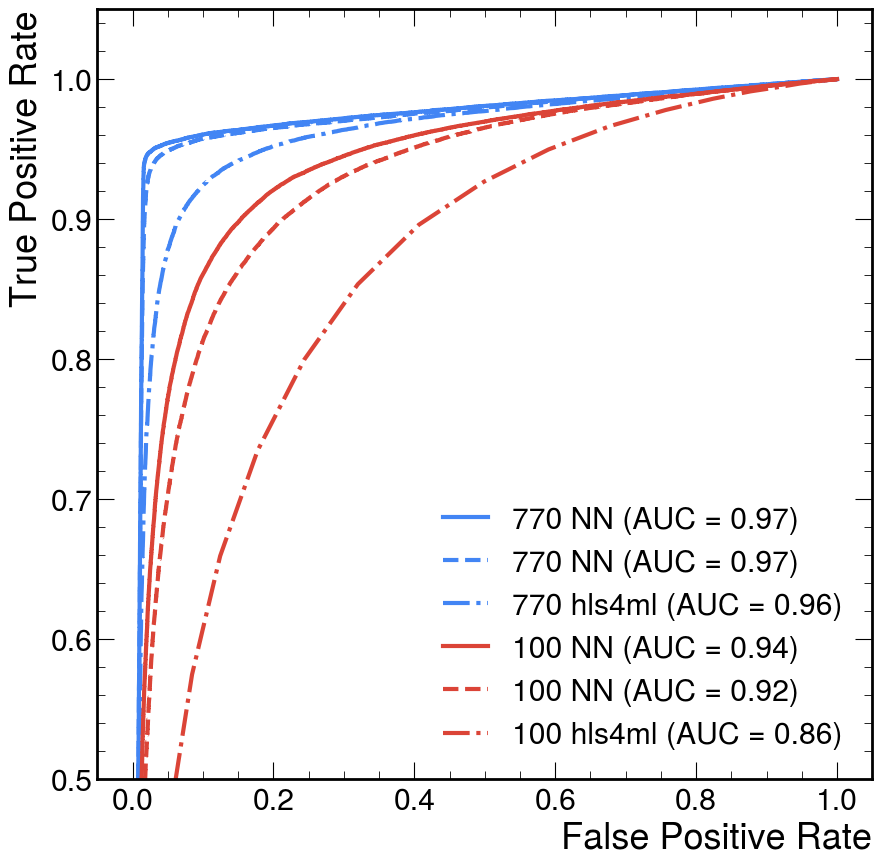

In [80]:
# Plot ROC curve
plt.figure(0)
plt.plot(fpr_v2, tpr_v2, color=colors[1], lw=3, label='{} (AUC = {:.2f})'.format('770 NN', roc_auc_v2))
plt.plot(fpr_v2_pnq, tpr_v2_pnq, color=colors[1], lw=3, linestyle='--', label='{} (AUC = {:.2f})'.format('770 NN', roc_auc_v2_pnq))
plt.plot(fpr_hls_v2, tpr_hls_v2, color=colors[1], lw=3, linestyle='-.', label='{} (AUC = {:.2f})'.format('770 hls4ml', roc_auc_hls_v2))

plt.plot(fpr_v3, tpr_v3, color=colors[0], lw=3, label='{} (AUC = {:.2f})'.format('100 NN', roc_auc_v3))
plt.plot(fpr_v3_pnq, tpr_v3_pnq, color=colors[0], lw=3, linestyle='--', label='{} (AUC = {:.2f})'.format('100 NN', roc_auc_v3_pnq))
plt.plot(fpr_hls_v3, tpr_hls_v3, color=colors[0], lw=3, linestyle='-.', label='{} (AUC = {:.2f})'.format('100 hls4ml', roc_auc_hls_v3))

# plt.plot(fpr_rf, tpr_rf, color=colors[2], lw=3, label='{} (AUC = {:.2f})'.format('100 RF', roc_auc_rf))
# plt.plot(fpr_gb, tpr_gb, color=colors[3], lw=3, label='{} (AUC = {:.2f})'.format('100 GB', roc_auc_gb))

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.ylim(bottom=0.5)
plt.legend()

## Filtering Data (re-balancing input distribution)

In [81]:
e_coords = np.mean(e_data[0], axis=2)
g_coords = np.mean(g_data[0], axis=2)

e_path = np.mean(e_data[0], axis=0)
g_path = np.mean(g_data[0], axis=0)


def reject_outliers(data, m=2):
    return data[abs(data - np.mean(data)) < m * np.std(data)]

def reject_outliers(data, g_data, m=10):
    return data[abs(data - np.mean(g_data)) > m * np.std(g_data)]


v = np.array([1, 1, 1, 1, 1, 1]) * (1/6)

e_path_i = np.convolve(e_path[0, :], v, mode='full')
e_path_q = np.convolve(e_path[1, :], v, mode='full')

e_path_i = reject_outliers(e_path_i, g_coords[0, :])
e_path_q = reject_outliers(e_path_q, g_coords[1, :])


g_path_i = np.convolve(g_path[0, :], v, mode='full')
g_path_q = np.convolve(g_path[1, :], v, mode='full')
# g_path_i = reject_outliers(g_path_i, e_coords[0, :], m=1) # Ground data is more consistent 
# g_path_q = reject_outliers(g_path_q, e_coords[1, :], m=1)

index = min(len(e_path_i), len(e_path_q))

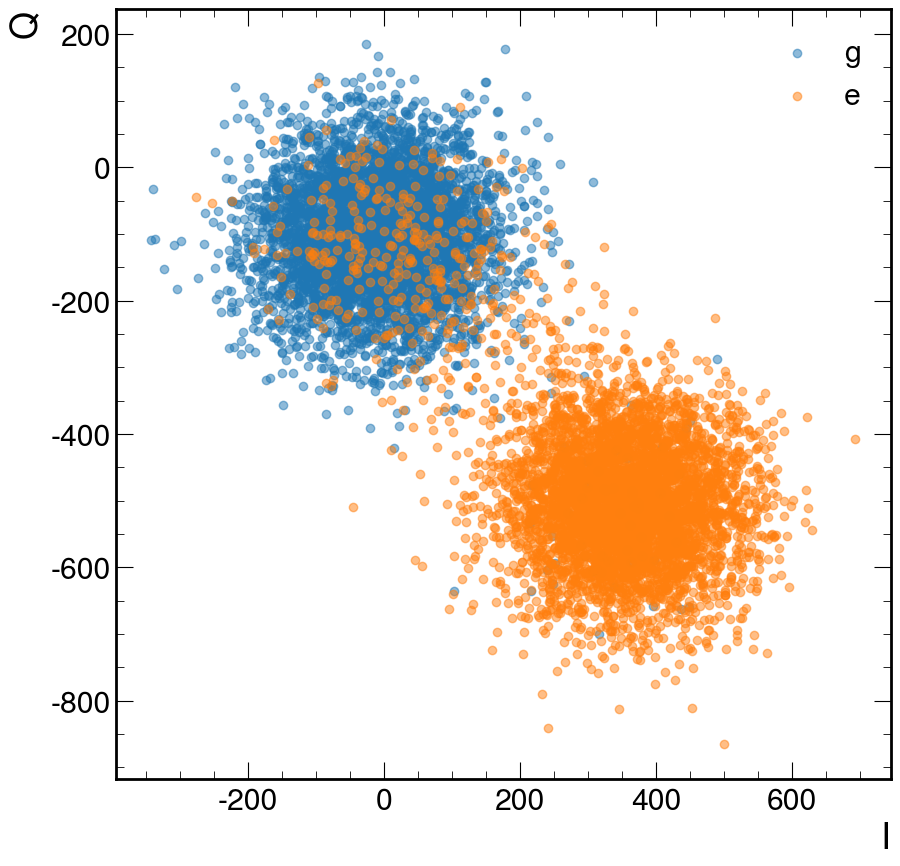

In [82]:
alpha = 0.5
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

plt.figure()
plt.scatter(g_coords[:, 0], g_coords[:, 1], label='g', alpha=alpha)
plt.scatter(e_coords[:, 0], e_coords[:, 1], label='e', alpha=alpha)

# plt.scatter(e_path_i[:index], e_path_q[:index], label='e', alpha=alpha)
# plt.scatter(g_path_i[:index], g_path_q[:index], label='g', alpha=alpha)
# plt.scatter(g_path[0, :], g_path[1, :], label='e', alpha=alpha)
# plt.scatter(e_path[0, :], e_path[1, :], label='e', alpha=alpha)

plt.xlabel('I')
plt.ylabel('Q')
plt.legend()